In [ ]:
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
import os
from glob import glob
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import keras
#from skimage.util.import montage2d
from skimage.io import imread
from scipy.io import loadmat # for loading mat files
from tqdm import tqdm_notebook as tqdm
#from tqdm import tqdm_notebook
in_path="/content/drive/My Drive/Colab Notebooks/Normalized"

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Normalized")

In [ ]:
def parse_mat(in_path):
    in_dat = loadmat(in_path, squeeze_me = True, struct_as_record = True)
    vec1_load, img_load,vec2_load = in_dat['data'].tolist()[1].tolist()
    return vec1_load, img_load, vec2_load
def mat_to_df(in_path):
    vec1_load, img_load, vec2_load = parse_mat(in_path)
    c_df = pd.DataFrame(dict(img=[x for x in img_load], 
                             vec1=[x for x in vec1_load],
                            vec2=[x for x in vec2_load]))
    c_df['group'] = os.path.basename(os.path.dirname(in_path))
    c_df['day'] = os.path.splitext(os.path.basename(in_path))[0]
    return c_df
def safe_mat_to_df(in_path):
    try:
        return mat_to_df(in_path)
    except ValueError as e:
        print('ValueError', e, in_path)
        return None 
mat_files = glob("/content/drive/My Drive/Colab Notebooks/Normalized/*/*.mat")
print(mat_files)
print(len(mat_files), 'normalized files found')

['/content/drive/My Drive/Colab Notebooks/Normalized/p09/day01.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day02.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day03.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day04.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day05.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day06.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day07.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day08.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day09.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day10.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day11.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day12.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day13.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p09/day14.mat', '/content/drive/My Drive/Colab Notebooks/Normal

In [ ]:
all_norm_df = pd.concat([safe_mat_to_df(in_path) for in_path in tqdm(mat_files)], ignore_index=True)
all_norm_df.sample(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


ValueError arrays must all be same length /content/drive/My Drive/Colab Notebooks/Normalized/p01/day39.mat
ValueError arrays must all be same length /content/drive/My Drive/Colab Notebooks/Normalized/p01/day69.mat



,img,vec1,vec2,group,day
193724,"[[120, 120, 120, 124, 127, 128, 128, 132, 134,...","[-0.204556946007125, 0.13250582787911874, -0.9...","[-0.1208365495214782, 0.17365146994673283, 0.0...",p00,day13
7178,"[[157, 157, 117, 76, 58, 49, 49, 31, 24, 17, 1...","[-0.10292688197815078, 0.14533599547879103, -0...","[-0.03536788561948047, 0.19429320203669403, 0....",p09,day18


In [ ]:
all_norm_df.head(2)

,img,vec1,vec2,group,day
0,"[[65, 54, 38, 25, 23, 21, 19, 23, 32, 50, 62, ...","[-0.13800101564298278, 0.1734662615427248, -0....","[-0.45082185419307497, -0.1253186256801033, -0...",p09,day01
1,"[[47, 45, 39, 34, 24, 27, 34, 45, 51, 65, 76, ...","[-0.09713919789645768, 0.06334769413203002, -0...","[-0.4257536252985748, -0.11727511837527646, -0...",p09,day01


213656 images loaded


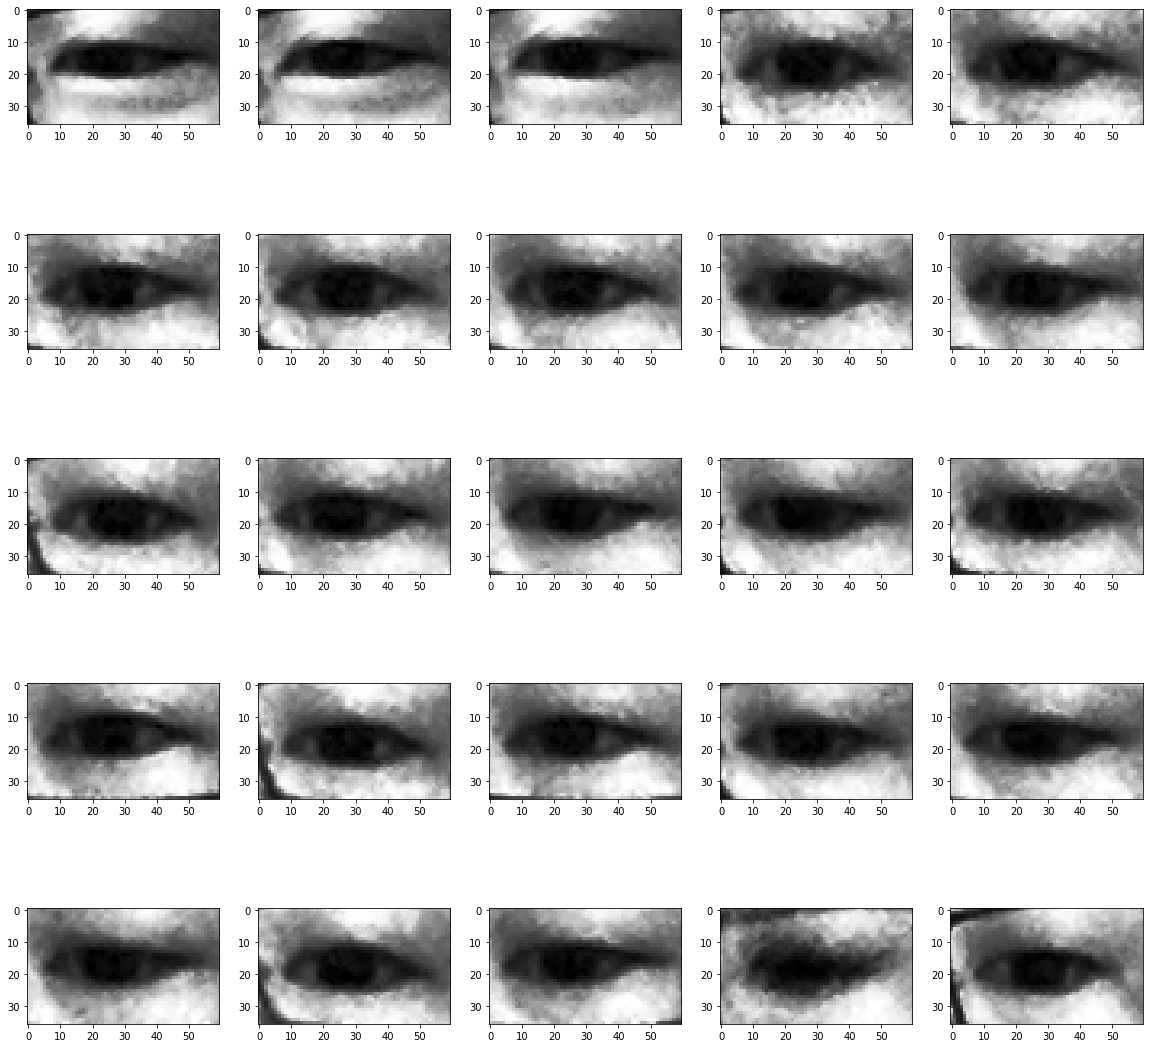

In [ ]:
#all_norm_df.tail(20)
print(all_norm_df.shape[0], 'images loaded')
#group_view = all_norm_df.groupby('group').apply(lambda x: x.sample(20)).reset_index(drop = True)
#print(group_view)
fig, m_axs = plt.subplots(5,5, figsize = (20, 20))
#for (_, c_row), c_ax in zip(group_view.iterrows(), m_axs.flatten()):
for (_, c_row), c_ax in zip(all_norm_df.iterrows(), m_axs.flatten()):
    c_ax.imshow((c_row['img']),cmap = 'gray')
   # cv2.imwrite('images\\'+str(t)+'.jpg',c_row)
    #c_ax.
    #c_ax.legend()
    #c_ax.set_title('{group}'.format(**c_row))
    #c_ax.imwrite(c_row[img],'images_train.jpg')

In [ ]:
all_norm_df.shape

(213656, 5)

In [ ]:
for v in ['vec1', 'vec2']:
    for i, x_dim in enumerate('xyz'):
        all_norm_df['{}_{}'.format(v, x_dim)] = all_norm_df[v].map(lambda x: x[i])
all_norm_df.sample(3)

,img,vec1,vec2,group,day,vec1_x,vec1_y,vec1_z,vec2_x,vec2_y,vec2_z
109251,"[[99, 113, 136, 158, 136, 76, 44, 30, 30, 33, ...","[-0.04402084911595349, 0.2726164460907535, -0....","[0.2760377853346606, -0.15108608299055878, 0.0...",p03,day57,-0.044021,0.272616,-0.961115,0.276038,-0.151086,0.021027
106437,"[[207, 215, 215, 201, 193, 164, 178, 145, 156,...","[-0.07228372613798004, 0.022394989200321094, -...","[0.17789347532328786, -0.07205786685784439, 0....",p03,day55,-0.072284,0.022395,-0.997133,0.177893,-0.072058,0.006429
39027,"[[131, 128, 125, 118, 114, 111, 108, 105, 106,...","[-0.1771667021974069, 0.09365756896633913, -0....","[-0.10879174481707392, -0.0070757717433677396,...",p06,day19,-0.177167,0.093658,-0.979714,-0.108792,-0.007076,-0.000385


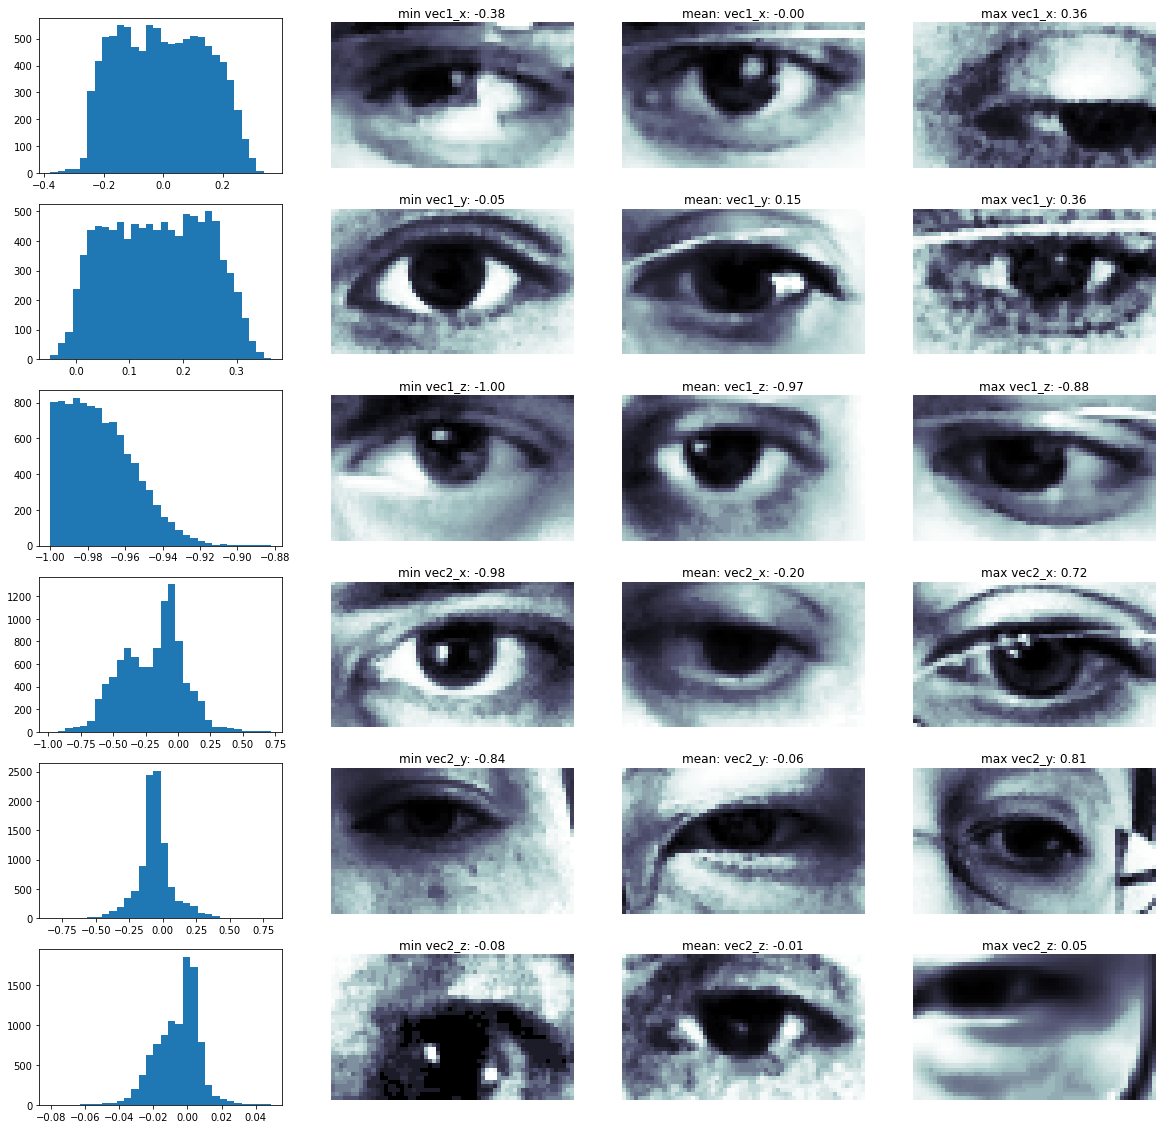

In [ ]:
fig, m_axs = plt.subplots(6, 4, figsize = (20, 20))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
from itertools import product
for (ax_dist, ax_min, ax_mean, ax_max), (v, (i, x)) in zip(m_axs, product(['vec1', 'vec2'], enumerate('xyz'))):
    # use random sampling to get a better feeling
    c_vec = all_norm_df.sample(10000)['{}_{}'.format(v, x)]
    ax_dist.hist(c_vec.values, 30)
    ax_dist.axis('on')
    j = c_vec.idxmin()
    ax_min.imshow(all_norm_df.iloc[j]['img'], cmap = 'bone')
    ax_min.set_title('min {}_{}: {:2.2f}'.format(v, x, all_norm_df.iloc[j]['{}_{}'.format(v, x)]))
    
    k = c_vec.idxmax()
    ax_max.imshow(all_norm_df.iloc[k]['img'], cmap = 'bone')
    ax_max.set_title('max {}_{}: {:2.2f}'.format(v, x, all_norm_df.iloc[k]['{}_{}'.format(v, x)]))
    
    p = np.abs(c_vec-np.mean(c_vec)).idxmin()
    ax_mean.imshow(all_norm_df.iloc[p]['img'], cmap = 'bone')
    ax_mean.set_title('mean: {}_{}: {:2.2f}'.format(v, x, all_norm_df.iloc[p]['{}_{}'.format(v, x)]))

In [ ]:
#find normalised data in all_norm_df
df1= all_norm_df.copy()

In [ ]:
df1.values

array([[array([[ 65,  54,  38, ...,  77,  73,  71],
       [ 28,  22,  22, ...,  73,  66,  65],
       [ 12,  21,  33, ...,  66,  65,  63],
       ...,
       [ 23,  83, 164, ..., 192, 183, 174],
       [ 16,  48, 122, ..., 186, 186, 183],
       [ 19,  32,  73, ..., 197, 192, 197]], dtype=uint8),
        array([-0.13800102,  0.17346626, -0.97512316]),
        array([-0.45082185, -0.12531863, -0.02877717]), ...,
        -0.45082185419307497, -0.1253186256801033, -0.028777165783540098],
       [array([[ 47,  45,  39, ...,  75,  76,  73],
       [ 17,  18,  22, ...,  75,  71,  63],
       [ 43,  53,  59, ...,  71,  65,  61],
       ...,
       [169, 169, 147, ..., 190, 186, 164],
       [120, 153, 136, ..., 190, 186, 174],
       [ 53, 120, 128, ..., 194, 182, 174]], dtype=uint8),
        array([-0.0971392 ,  0.06334769, -0.99325276]),
        array([-0.42575363, -0.11727512, -0.02538034]), ...,
        -0.4257536252985748, -0.11727511837527646, -0.025380343727830827],
       [array([[ 2

In [ ]:
len(df1)

213656

In [ ]:
df1.describe

<bound method NDFrame.describe of                                                       img  ...    vec2_z
0       [[65, 54, 38, 25, 23, 21, 19, 23, 32, 50, 62, ...  ... -0.028777
1       [[47, 45, 39, 34, 24, 27, 34, 45, 51, 65, 76, ...  ... -0.025380
2       [[26, 28, 33, 43, 50, 55, 69, 85, 112, 160, 16...  ... -0.023964
3       [[46, 53, 53, 60, 72, 90, 116, 116, 106, 128, ...  ... -0.013750
4       [[180, 148, 156, 166, 132, 125, 148, 156, 125,...  ...  0.001628
...                                                   ...  ...       ...
213651  [[210, 217, 217, 217, 217, 225, 210, 203, 203,...  ...  0.003559
213652  [[197, 218, 218, 209, 218, 209, 203, 197, 209,...  ...  0.003464
213653  [[206, 206, 206, 206, 206, 212, 217, 228, 235,...  ...  0.001900
213654  [[206, 212, 229, 224, 212, 217, 217, 206, 212,...  ...  0.003431
213655  [[217, 206, 210, 210, 199, 210, 210, 210, 213,...  ...  0.021074

[213656 rows x 11 columns]>

In [ ]:
df1['img'][0].shape

(36, 60)

In [ ]:
df1['theta'] = -(df1['vec2_y'])


train= df1[:10000]

In [ ]:
train.tail(5)

,img,vec1,vec2,group,day,vec1_x,vec1_y,vec1_z,vec2_x,vec2_y,vec2_z,theta
9995,"[[107, 102, 96, 91, 91, 85, 91, 91, 81, 85, 91...","[0.05747965360274082, 0.10084254808294553, -0....","[-0.1170403022428469, 0.09300907606692839, 0.0...",p11,day12,0.057480,0.100843,-0.993241,-0.117040,0.093009,0.005453,-0.093009
9996,"[[122, 114, 105, 110, 110, 101, 89, 83, 73, 73...","[-0.10535276512620406, 0.026481622307698013, -...","[-0.7698989802373313, -0.03999400150015691, -0...",p11,day12,-0.105353,0.026482,-0.994082,-0.769899,-0.039994,-0.016207,0.039994
9997,"[[41, 41, 45, 50, 48, 56, 65, 77, 88, 107, 129...","[-0.15240303660600252, 0.09448354250986751, -0...","[-0.03292573457649006, -0.45927965238404617, -...",p11,day12,-0.152403,0.094484,-0.983792,-0.032926,-0.459280,-0.007698,0.459280
9998,"[[154, 136, 129, 110, 110, 107, 102, 96, 92, 9...","[0.041689892445365744, 0.10048635295991155, -0...","[-0.06667086875920708, 0.41405996482982593, 0....",p11,day12,0.041690,0.100486,-0.994065,-0.066671,0.414060,0.014009,-0.414060
9999,"[[73, 68, 65, 62, 65, 62, 57, 53, 57, 62, 65, ...","[-0.08464168536901918, 0.06846263086010498, -0...","[-0.11096696201724635, 0.40252794515599977, 0....",p11,day12,-0.084642,0.068463,-0.994057,-0.110967,0.402528,0.022665,-0.402528


CNN


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Concatenate
from keras import layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(36, 60, 1)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.MaxPooling2D(3),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(3),
        layers.Flatten(),
        layers.Dense(500),
        
        
    ]
)

feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.output
)
initial_model.compile(loss='mse',optimizer='sgd',metrics=['mse','mae','accuracy'])

In [ ]:
feature_vector=pd.DataFrame()
for i in range(0,10000):
  feature_vector['{}'.format(i)]=i
j=0
for v in train['img']:
  x=np.array( train['img'][j])
  x = x.reshape((1, 36, 60,1))
  features = feature_extractor(x)
  proto_tensor=tf.make_tensor_proto(features)
  final=tf.make_ndarray(proto_tensor)
  final=final.reshape(500,)
  feature_vector['{}'.format(j)]=final
  j=j+1

In [ ]:
feature_vector

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.603368,1.955858,2.283706,1.473723,3.079507,2.529348,3.886589,3.143693,2.280365,0.890394,0.480585,2.816822,2.320345,2.002548,2.296412,1.811541,0.715722,3.085205,1.850372,1.414261,0.760222,-0.209572,1.884380,0.182736,-1.296206,-1.277457,0.341754,-0.129482,0.026484,-2.046350,-1.658356,0.177279,-1.234003,2.095527,-0.223383,-2.924406,-0.950403,-1.611443,-1.369496,-1.955939,...,-5.084876,-2.206505,-1.417565,1.655092,0.480162,0.201168,2.527215,2.347554,2.584514,-0.150883,0.308509,1.687690,1.489564,-0.929887,0.554317,-1.864458,1.266925,-1.433503,-3.910815,1.390526,0.474161,-3.128970,0.075835,0.037273,-1.876176,3.416772,2.160538,-0.978445,0.939376,0.000234,-2.211595,1.957538,3.348616,-2.886256,-1.727467,-1.028046,0.956794,-2.726802,-0.505612,-3.413000
1,-10.963099,-11.445908,-11.495393,-7.151205,-7.272452,-7.145597,-8.603741,-8.267905,-6.675044,-6.119075,-8.456913,-8.456298,-6.696709,-8.229899,-8.620735,-5.797057,-9.005399,-6.574903,-9.593265,-5.938123,-5.831919,-8.004289,-5.445656,-7.999460,-8.533148,-7.371188,-6.263641,-7.444718,-7.366889,-15.017683,-8.288458,-6.986116,-9.226995,-16.068539,-7.185725,-6.656900,-7.685612,-12.144374,-6.535216,-7.599385,...,-7.905350,-7.786592,-7.721049,-8.413682,-9.719413,-9.180390,-10.694889,-8.800250,-10.793488,-8.545876,-9.631708,-7.103038,-10.188426,-7.958017,-6.686712,-7.492085,-10.730482,-9.010355,-8.709058,-7.563447,-5.515938,-8.983152,-5.085005,-6.086555,-6.663933,-8.192110,-8.862095,-9.112940,-9.438480,-8.551410,-12.903907,-8.253890,-8.250060,-11.156187,-9.343076,-8.425125,-9.433396,-16.910433,-14.363030,-15.827691
2,-20.375643,-21.054522,-21.999294,-15.328617,-14.452935,-14.271294,-14.846157,-14.325054,-13.578593,-12.727084,-14.375536,-13.974986,-12.577824,-15.238464,-14.458577,-13.821128,-15.716333,-13.262069,-14.632970,-14.238290,-12.619040,-15.479436,-13.271909,-12.483312,-13.434505,-13.914082,-13.981395,-12.367640,-13.687200,-16.860334,-13.682905,-14.040359,-13.120746,-14.867345,-13.596837,-14.757426,-14.398204,-17.173986,-13.630706,-14.034014,...,-13.340815,-20.544340,-23.030970,-20.066746,-12.212816,-12.978376,-17.544134,-19.570829,-16.302231,-12.940131,-12.550036,-22.626173,-16.770416,-19.752905,-21.537725,-13.399314,-18.429905,-12.987029,-17.684334,-13.388190,-15.301024,-18.126408,-16.702801,-17.447927,-17.969662,-19.209175,-20.418356,-22.806446,-15.016608,-22.492813,-22.333420,-21.235443,-19.008394,-19.938780,-22.935600,-19.004190,-16.445951,-20.233711,-16.925907,-22.005161
3,8.908743,10.117127,9.763461,0.289772,0.747982,2.051951,2.077327,1.116387,0.322336,-0.155386,-0.783203,0.929557,0.736633,1.433731,1.539801,0.230182,-0.107707,1.811970,0.948801,1.009800,0.551165,-0.780367,2.364097,1.265535,-1.859894,-1.051198,0.015225,-0.900431,-0.739962,5.081431,0.278590,-0.184929,0.226076,1.339073,-1.370168,-0.937551,0.775329,3.933224,-1.071829,-0.658115,...,1.236709,-2.241083,-0.872656,-1.274047,3.264755,1.901100,1.477233,-1.325304,1.804487,2.738870,3.611677,-1.013290,1.048044,-2.685061,1.718804,0.981478,2.302863,0.768643,-0.746419,-0.616623,0.070919,1.359933,-0.687696,-1.575557,-1.752988,3.216012,2.640355,0.677122,2.274106,0.367246,-0.260170,-2.423751,-1.568200,-2.666370,2.373791,3.752985,0.640787,4.609057,1.832874,1.009160
4,-0.049424,-0.074380,-1.281780,1.072173,1.008343,0.718203,-1.399960,0.096933,0.675423,1.641083,1.485194,-0.408257,1.657908,1.126571,-0.366475,5.566254,0.120736,2.529255,0.491712,-0.185686,1.289546,1.308386,1.308603,2.647118,2.166976,-0.258701,0.905683,0.212831,2.657304,3.349383,-1.362518,1.043403,2.104016,2.331728,0.292487,-0.665225,-1.026836,2.602659,1.697720,-0.078696,...,2.366631,5.461889,8.641301,5.347424,5.446871,5.071472,5.149148,5.593315,4.924346,5.76337

In [ ]:
feature_vector=feature_vector.transpose()

In [ ]:
feature_vector.shape


(10000, 500)

In [ ]:

train.head(5)
train.shape

(10000, 12)

In [ ]:
feature_vector.to_csv(r'/content/drive/My Drive/Colab Notebooks/feature_vector1.csv')

In [ ]:
train.columns

Index(['img', 'vec1', 'vec2', 'group', 'day', 'vec1_x', 'vec1_y', 'vec1_z',
       'vec2_x', 'vec2_y', 'vec2_z', 'theta'],
      dtype='object')

In [ ]:
dataset=feature_vector.copy()

In [ ]:
dataset.shape

(10000, 500)

In [ ]:
#head pose values
sub_train=pd.DataFrame()
sub_train = train[['vec1_x','vec1_y','vec1_z']]
sub_train

,vec1_x,vec1_y,vec1_z
0,-0.138001,0.173466,-0.975123
1,-0.097139,0.063348,-0.993253
2,-0.112931,0.192808,-0.974716
3,0.125798,0.026056,-0.991714
4,-0.167665,0.055137,-0.984301
...,...,...,...
9995,0.057480,0.100843,-0.993241
9996,-0.105353,0.026482,-0.994082
9997,-0.152403,0.094484,-0.983792
9998,0.041690,0.100486,-0.994065


In [ ]:
sub_train.to_csv(r'/content/drive/My Drive/Colab Notebooks/sub_train1.csv')

In [ ]:
dataset.shape

(10000, 500)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving feature_vector1.csv to feature_vector1.csv


In [ ]:
X=pd.read_csv('feature_vector1.csv')

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,vec1_x,vec1_x.1,vec1_x.2
0,1.603368,-10.963099,-20.375643,8.908743,-0.049424,-6.429707,20.857578,-9.907190,11.153986,11.839704,-10.237593,12.972935,17.643547,-4.725798,16.009268,-6.709917,14.692737,7.453931,-5.700324,-26.053345,1.513962,-15.322924,-8.290666,26.580040,0.600135,-4.404527,-4.576412,8.181950,20.675058,5.993861,-10.069727,1.277122,-0.840440,1.937654,0.573764,5.425349,-18.286755,-2.092204,22.770945,-2.462154,...,-6.553260,1.328116,-3.461689,8.523994,15.397034,8.595672,-8.747475,14.854474,10.318592,15.336371,-21.379393,11.742855,17.288126,0.506089,28.973244,-14.714554,-4.453420,-21.940790,3.144000,27.946827,30.668674,2.362427,29.288017,14.657390,-7.342069,-27.535358,2.236161,-23.803446,30.839970,-5.222778,6.075194,-12.066448,-25.341946,2.938830,-7.884194,-8.241935,-11.695115,-0.138001,0.861999,1.861999
1,1.955858,-11.445908,-21.054522,10.117127,-0.074380,-7.498739,21.505762,-10.136506,11.041110,10.651703,-10.126867,13.771008,17.013270,-5.024034,16.116907,-7.099521,14.790461,7.364889,-4.922953,-24.956236,2.179207,-14.687517,-8.544129,25.888453,0.959647,-5.155209,-4.273540,8.300265,19.794514,7.122230,-10.281365,1.454381,-0.030922,1.208134,-0.676499,5.101555,-18.223856,-1.360013,22.164370,-1.435792,...,-6.431170,0.436262,-4.464723,8.369573,16.263103,8.853216,-10.585288,15.017577,10.100746,14.654451,-20.771670,12.354008,16.047737,0.766341,27.429909,-14.526028,-4.764238,-21.463080,3.158272,26.637245,29.532623,1.612826,29.150682,14.350183,-8.349197,-27.754501,2.364860,-23.438131,31.357828,-4.700690,6.479759,-10.995459,-23.559850,2.143460,-7.976105,-8.755587,-11.611436,-0.097139,0.902861,1.902861
2,2.283706,-11.495393,-21.999294,9.763461,-1.281780,-8.390552,20.823551,-9.631607,9.822679,11.768198,-11.107305,14.144108,17.274937,-5.464308,17.359064,-8.161751,13.672061,8.107415,-4.359074,-25.437433,1.376927,-13.707724,-7.405994,25.585596,0.574970,-4.947658,-6.234108,7.822452,21.215408,6.859505,-11.076139,1.331700,-0.091076,1.738889,-0.809739,5.407218,-17.803299,-2.885337,22.082874,-2.576604,...,-6.215814,0.159707,-5.130626,6.477122,16.376667,7.769081,-8.989898,14.667861,11.243788,15.073905,-21.068916,11.831723,15.834949,2.206087,26.583841,-13.650262,-4.485287,-21.317986,3.630661,27.252980,30.316172,2.258132,28.079966,13.859193,-7.713631,-27.365967,2.436550,-23.884882,30.496930,-5.039596,6.520150,-12.003200,-24.143066,1.429220,-8.033532,-9.697862,-11.951702,-0.112931,0.887069,1.887069
3,1.473723,-7.151205,-15.328617,0.289772,1.072173,-4.974957,13.240509,-8.464917,9.641580,8.102734,-9.000030,12.801739,13.731995,-4.122336,15.766108,-3.857710,10.507893,6.923434,-5.181050,-17.109886,5.186122,-16.637047,-10.004444,21.423733,3.933410,-4.689317,-0.337669,4.882457,20.826164,6.568869,-7.980606,0.547994,4.049326,-3.700246,2.136833,1.198384,-11.289812,-0.788678,21.852644,-3.460555,...,-12.496900,-0.097476,-5.348196,7.155400,11.363523,8.332171,-8.147160,7.902461,8.527379,14.595411,-11.770127,9.330014,14.240837,-4.240796,21.068188,-14.665991,-3.475389,-10.226702,6.396157,23.583490,25.550869,1.889249,23.332947,11.451742,-5.150074,-22.908789,7.089863,-18.691936,28.354424,-4.898530,5.593843,-7.351266,-24.329035,10.687053,-8.139142,-4.724929,-8.194474,0.125798,1.125798,2.125798
4,3.079507,-7.272452,-14.452935,0.747982,1.008343,-5.744659,13.384796,-8.597321,6.672969,8.467459,-8.784350,10.363313,13.734653,-3.934076,14.003733,-4.398154,7.595365,8.457234,-4.273421,-18.235302,6.283240,-15.862397,-7.122919,19.382870,2.920387,-5.338869,-1.437931,3.772517,19.541903,4.737108,-6.451516,1.820106,0.870345,-1.160223,1.739740,1.923215,-11.669066,-0.518240,21.344751,-3.438079,...,-12.602066,1.461754,-4.223321,7.416200,10.676833,8.531553,-6.573184,9.208932,7.907517,16.192959,-10.841290,9.823341,14.45954

In [ ]:
# Separate features and targets
X_train = X[:9000]
y_train= train['theta'][:9000]

In [ ]:
X_test= X[9000:10000]
y_test= train['theta'][9000:10000]

In [ ]:
# Create the model
model = Sequential()
model.add(Dense(32, input_dim=503, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# Configure the model and start training
model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['mean_squared_error'])
abc=model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1, validation_split=0.2)

Train on 7200 samples, validate on 1800 samples
Epoch 1/50
7200/7200 [==============================] - 0s 47us/step - loss: 0.1702 - mean_squared_error: 0.0504 - val_loss: 0.2823 - val_mean_squared_error: 0.1140
Epoch 2/50
7200/7200 [==============================] - 0s 38us/step - loss: 0.1696 - mean_squared_error: 0.0502 - val_loss: 0.3239 - val_mean_squared_error: 0.1484
Epoch 3/50
7200/7200 [==============================] - 0s 37us/step - loss: 0.1702 - mean_squared_error: 0.0503 - val_loss: 0.2590 - val_mean_squared_error: 0.0955
Epoch 4/50
7200/7200 [==============================] - 0s 38us/step - loss: 0.1688 - mean_squared_error: 0.0500 - val_loss: 0.3020 - val_mean_squared_error: 0.1299
Epoch 5/50
7200/7200 [==============================] - 0s 37us/step - loss: 0.1696 - mean_squared_error: 0.0503 - val_loss: 0.2809 - val_mean_squared_error: 0.1143
Epoch 6/50
7200/7200 [==============================] - 0s 39us/step - loss: 0.1677 - mean_squared_error: 0.0491 - val_loss: 0.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                16128     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


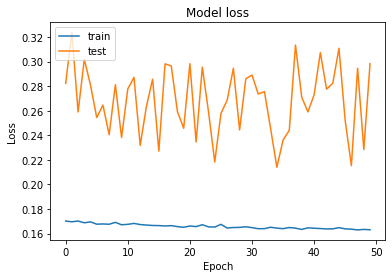

In [ ]:
plt.plot(abc.history['loss'])
plt.plot(abc.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=10)

1000/1000 [==============================] - 0s 66us/step


In [ ]:
results

[0.34411725379526614, 0.15392617881298065]

In [ ]:
predicted_value=model.predict(X_test[:10])

In [ ]:
predicted_value

array([[-0.25045258],
       [-0.09991299],
       [-0.24857095],
       [ 0.03425071],
       [-0.12715542],
       [-0.24670286],
       [ 0.0345358 ],
       [-0.18067677],
       [-0.01384744],
       [-0.19417405]], dtype=float32)